### Building a CNN model to detect closed eyes 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
#to get training and test data
from sklearn.model_selection import train_test_split
# to work on images 
from PIL import Image

### Step 1 : Getting and Splitting the data

In [5]:
# Path to the image folder -----------------------------------change this accordingly 
image_folder = "T:\TOSHITH\PROGRAMMING\CNN-Project---Driver-Drowsiness-Detection\image_data_processed"

<>:2: SyntaxWarning: invalid escape sequence '\T'
<>:2: SyntaxWarning: invalid escape sequence '\T'
C:\Users\toshi\AppData\Local\Temp\ipykernel_59632\4158979833.py:2: SyntaxWarning: invalid escape sequence '\T'
  image_folder = "T:\TOSHITH\PROGRAMMING\CNN-Project---Driver-Drowsiness-Detection\image_data_processed"


In [6]:
#loading the data into numpy array 
image_list = []
label_list = []

#class_names = os.listdir(image_folder) #names of the subfolder
class_names=["Open","Closed"]#we know our data

for class_name in class_names:
    class_path=os.path.join(image_folder, class_name)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        try:
            img = Image.open(img_path)
            #img = img.resize((200,200))  # Resize to desired shape
            img_array = np.array(img)
            image_list.append(img_array)

            if class_name == 'Open':
                label_list.append(1)#1 if open else 0 
            else:
                label_list.append(0)
        except Exception as e:
            print(f"Failed to load {img_path}: {e}")

# Convert to NumPy arrays
images = np.array(image_list)
labels = np.array(label_list)

print("Shape of images:", images.shape)
print("Shape of labels:", labels.shape)

Shape of images: (1452, 200, 200)
Shape of labels: (1452,)


In [7]:
# creating a 70|15|15 training test and validation split 

# 15% split of test data
image_temp, image_test, label_temp, label_test = train_test_split(
    images, labels, test_size=0.15, random_state=42, stratify=labels
)

# 70 and 15 percent split of training and validation 0.1765=15/85  
image_train, image_val, label_train, label_val = train_test_split(
    image_temp, label_temp, test_size=0.1765, random_state=99, stratify=label_temp
)

print("no of images for training",len(image_train))
print("no of images for testing",len(image_test))
print("no of images for validation",len(image_val))
type(image_test)
image_test.shape

no of images for training 1016
no of images for testing 218
no of images for validation 218


(218, 200, 200)

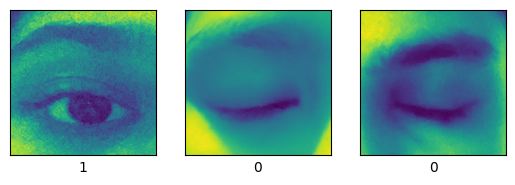

In [12]:
#plotting 3 images to inspect our data
#change here to plot image_val and image_test
plot_image=image_train
plot_label=label_train
import random
plt.figure()
image_pos=1
for i in range(3):
    index=random.randint(0,len(image_test))

    plt.subplot(1,3,image_pos)
    plt.imshow(plot_image[index])
    plt.xlabel(str(plot_label[index]))
    plt.xticks([])
    plt.yticks([])

    image_pos+=1
plt.show()

### Step 2 : Building the CNN structure 

In [13]:
#scailing the image data to make it easier for our model to learn
image_train, image_test, image_val = image_train/255, image_test/255, image_val/255

In [14]:
import tensorflow as tf
from tensorflow.keras import layers,models

#input to the model is of size 200x200
 
# THIS IS THE FIRST HALF 
# CONVOLUTION LAYER 

model = models.Sequential()

model.add(layers.Conv2D(64,(3,3), activation='relu', padding='same', input_shape=(200, 200, 1)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(32,(3,3), activation='relu', padding='same',))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(32,(3,3), activation='relu', padding='same',))

c:\Users\toshi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 200, 200, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 100, 100, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 100, 100, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 50, 50, 32)     │         9,248 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,352 (110.75 KB)

 Trainable params: 28,352 (110.75 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:

# THIS IS THE SECOND HALF 
# THE DENSE LAYER 
model.add(layers.Flatten())

# Dropout after flattening to prevent over fitting 
model.add(layers.Dropout(0.5))

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.3))  # Dropout between dense layers

model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.2))  # Optional: can be adjusted/removed

# Final layer for binary classification
model.add(layers.Dense(1, activation='sigmoid'))  # Use sigmoid for binary classification

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 200, 200, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 100, 100, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 100, 100, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 50, 50, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 80000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 80000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    10,240,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,272,641 (39.19 MB)

 Trainable params: 10,272,641 (39.19 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
#compile the model
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

#implementing for early stopping
import tensorflow 
early_stopping=tensorflow.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

### Step3: Training the CNN model

In [19]:
model_history = model.fit(
    image_train, label_train,
    validation_data=(image_val, label_val),  # use this instead of validation_split
    batch_size=16,
    epochs=100,
    callbacks=[early_stopping]
)

Epoch 1/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 11s 140ms/step - accuracy: 0.5057 - loss: 0.7005 - val_accuracy: 0.8716 - val_loss: 0.4230
Epoch 2/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 142ms/step - accuracy: 0.8404 - loss: 0.4274 - val_accuracy: 0.8624 - val_loss: 0.2988
Epoch 3/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 145ms/step - accuracy: 0.8839 - loss: 0.3003 - val_accuracy: 0.9174 - val_loss: 0.2575
Epoch 4/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 148ms/step - accuracy: 0.9119 - loss: 0.2293 - val_accuracy: 0.9358 - val_loss: 0.2774
Epoch 5/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - accuracy: 0.9212 - loss: 0.2073 - val_accuracy: 0.9037 - val_loss: 0.2464
Epoch 6/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 143ms/step - accuracy: 0.9485 - loss: 0.1482 - val_accuracy: 0.9220 - val_loss: 0.2396
Epoch 7/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 145ms/step - accuracy: 0.9486 - loss: 0.1392 - val_accuracy: 0.9495 - val_loss: 0.1964
Epoch 8/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 143ms/step - accuracy: 0.9597 - loss: 0.1063 - val_a

<>:10: SyntaxWarning: invalid escape sequence '\T'
<>:10: SyntaxWarning: invalid escape sequence '\T'
C:\Users\toshi\AppData\Local\Temp\ipykernel_59632\2520221437.py:10: SyntaxWarning: invalid escape sequence '\T'
  plt.savefig("T:\TOSHITH\PROGRAMMING\CNN-Project---Driver-Drowsiness-Detection\support_files\Accuracy_vs_epochs.jpg", dpi=300, bbox_inches='tight')


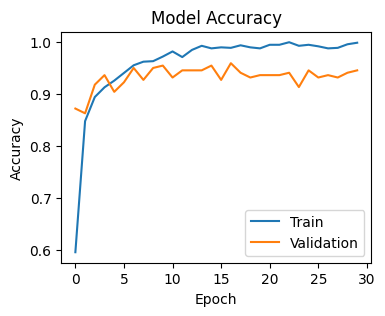

In [24]:
plt.figure(figsize=(4, 3))
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['Train', 'Validation'], loc="lower right")

# Save before showing
plt.savefig("T:\TOSHITH\PROGRAMMING\CNN-Project---Driver-Drowsiness-Detection\support_files\Accuracy_vs_epochs.jpg", dpi=300, bbox_inches='tight')
plt.show()

<>:9: SyntaxWarning: invalid escape sequence '\T'
<>:9: SyntaxWarning: invalid escape sequence '\T'
C:\Users\toshi\AppData\Local\Temp\ipykernel_59632\3227809679.py:9: SyntaxWarning: invalid escape sequence '\T'
  plt.savefig("T:\TOSHITH\PROGRAMMING\CNN-Project---Driver-Drowsiness-Detection\support_files\loss_vs_epochs.jpg", dpi=300, bbox_inches='tight')


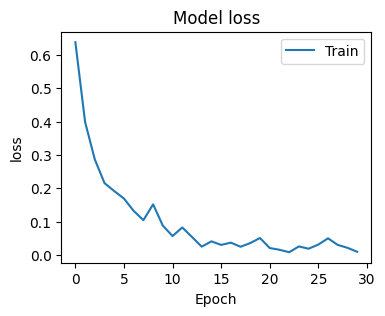

In [32]:
plt.figure(figsize=(4, 3))
plt.plot(model_history.history["loss"])
plt.title("Model loss")
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.legend(['Train'], loc="upper right")

# Save before showing
plt.savefig("T:\TOSHITH\PROGRAMMING\CNN-Project---Driver-Drowsiness-Detection\support_files\loss_vs_epochs.jpg", dpi=300, bbox_inches='tight')
plt.show()

### Step 4: Judging the accuracy of the model

In [27]:
from sklearn.metrics import accuracy_score

#testing with know values
image_predicted = model.predict(image_test)

# Convert predicted probabilities to class indices
predicted_classes = (image_predicted > 0.5).astype(int)

# Use the actual labels, not image data
true_classes = label_test 
# Now calculate accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(true_classes, predicted_classes)
print("Accuracy:", score*100,"%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step
Accuracy: 96.3302752293578 %


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step
Misclassified at index 33
Predicted: 0, Actual: 1


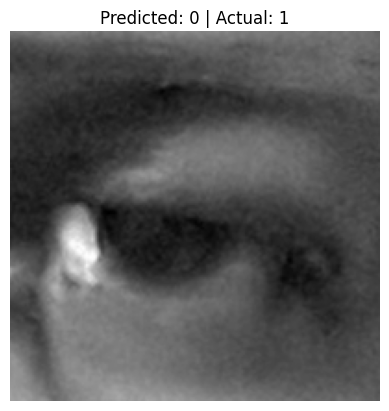

Misclassified at index 34
Predicted: 0, Actual: 1


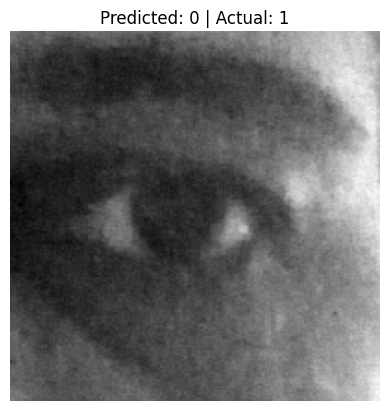

Misclassified at index 52
Predicted: 0, Actual: 1


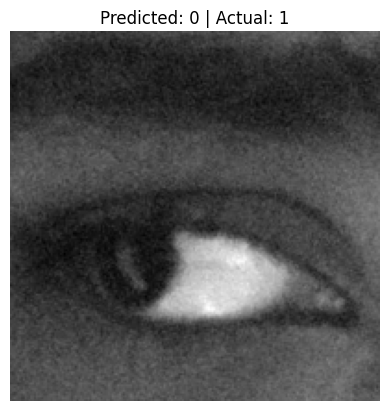

Misclassified at index 78
Predicted: 1, Actual: 0


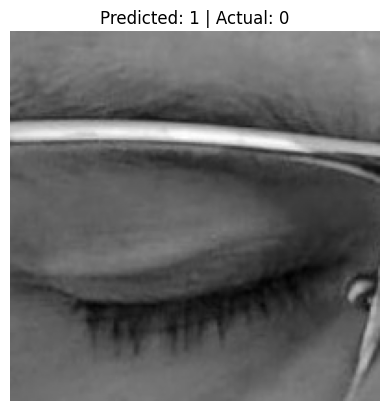

Misclassified at index 87
Predicted: 0, Actual: 1


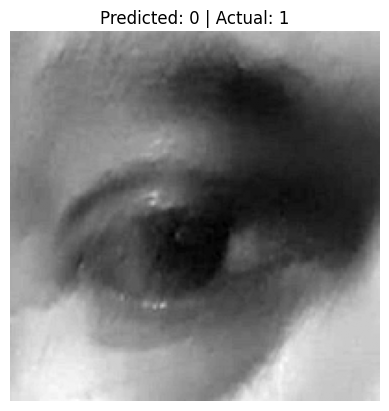

Misclassified at index 106
Predicted: 1, Actual: 0


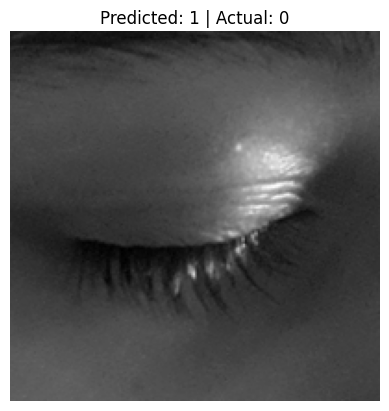

Misclassified at index 124
Predicted: 1, Actual: 0


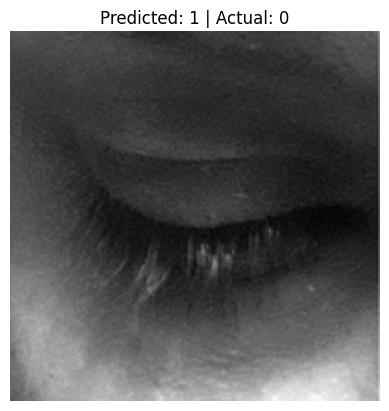

Misclassified at index 172
Predicted: 0, Actual: 1


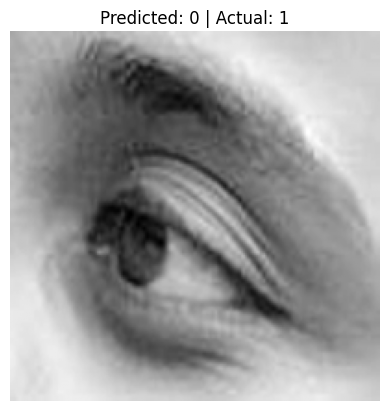

Misclassified at index 181
Predicted: 0, Actual: 1


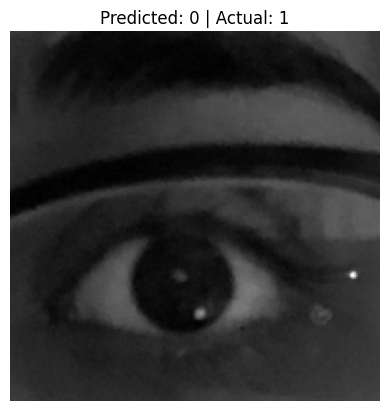

Accuracy: 95.87155963302753 %


In [ ]:
#run this block if you want to see what images your model gets wrong while predicting
#click enter to move to the next photo 
from sklearn.metrics import accuracy_score

# Predict on test data
image_predicted = model.predict(image_test)
predicted_classes = (image_predicted > 0.5).astype(int).flatten()
true_classes = label_test.flatten()

# Loop and pause on each misclassification
for idx in range(len(predicted_classes)):
    if predicted_classes[idx] != true_classes[idx]:
        print(f"Misclassified at index {idx}")
        print(f"Predicted: {predicted_classes[idx]}, Actual: {true_classes[idx]}")

        # Show image
        plt.imshow(image_test[idx].reshape(200, 200), cmap='gray')
        plt.title(f"Predicted: {predicted_classes[idx]} | Actual: {true_classes[idx]}")
        plt.axis('off')
        plt.show()

        input("Press Enter to continue to the next image...")  # Wait for key press

# Accuracy
score = accuracy_score(true_classes, predicted_classes)
print("Accuracy:", score * 100, "%")


After testing we got an accuracy of around 96% 

In [28]:
model.save(f"driver_drowsiness.keras")

### Step 5: Trying out the model on custom images 

In [29]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

def predict_output(image_input):
    # Load the model
    model = load_model("driver_drowsiness.keras")

    # Convert to grayscale if not already
    image = Image.fromarray(image_input).convert("L")

    # Resize to 200x200
    image = image.resize((200, 200))

    # Convert to array and normalize
    image_array = img_to_array(image) / 255.0  # shape: (200, 200, 1)

    # Add batch dimension
    image_array = np.expand_dims(image_array, axis=0)  # shape: (1, 200, 200, 1)

    # Predict
    prediction = model.predict(image_array)
    predicted_label = "Open" if prediction[0][0] > 0.5 else "Closed"

    plt.imshow(image, cmap="gray")
    plt.title(f"Predicted Label: {predicted_label}")
    plt.axis("off")
    plt.show()

<>:5: SyntaxWarning: invalid escape sequence '\T'
<>:5: SyntaxWarning: invalid escape sequence '\T'
C:\Users\toshi\AppData\Local\Temp\ipykernel_59632\289745471.py:5: SyntaxWarning: invalid escape sequence '\T'
  img = Image.open("T:\TOSHITH\PROGRAMMING\CNN-Project---Driver-Drowsiness-Detection\support_files\closed_eye.jpg").convert("L")  # grayscale


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


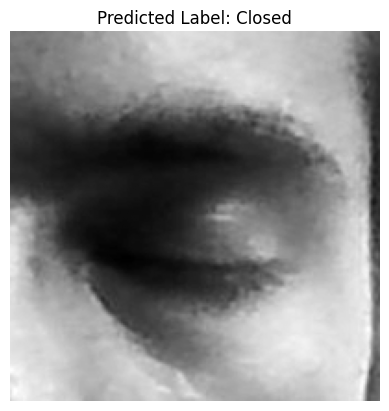

In [ ]:
from PIL import Image

#as image generated from ms paint has a white background

img = Image.open("T:\TOSHITH\PROGRAMMING\CNN-Project---Driver-Drowsiness-Detection\support_files\closed_eye.jpg").convert("L")  # grayscale
img = Image.open("my_right_eye.jpg").convert("L")
img = Image.open("my_left_eye.jpg").convert("L")

image_input=np.array(img)
predict_output(image_input)